In [1]:
modelo_meta = "meta-llama/Llama-3.2-3B-Instruct"
modelo_mixtral = "mistralai/Mixtral-8x7B-v0.1"

In [1]:
# from google.colab import userdata
# login(userdata.get('HF_TOK'))
import os
from huggingface_hub import login

# Inicia sesión usando tu token
login(os.getenv('HF_TOK'))

`torch_dtype=torch.bfloat16`: <br>
   Establece el tipo de dato a `bfloat16`, un formato de 16 bits eficiente en términos de memoria y velocidad, ideal para entrenar modelos grandes sin perder demasiada precisión.

`device_map="auto"`: <br>
   Configura automáticamente el pipeline para que se distribuya el modelo entre los dispositivos disponibles (GPU, CPU), lo cual es útil para gestionar la carga de modelos grandes en múltiples dispositivos.

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

model_id = "meta-llama/Llama-3.2-3B-Instruct"
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

outputs = pipe(
    messages,
    max_new_tokens=256,
)

print(outputs[0]["generated_text"][-1])

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'role': 'assistant', 'content': "Yer lookin' fer a swashbucklin' chatbot, eh? Alright then, matey! I be Captain Clueless, the scurviest pirate bot to ever sail the Seven Seas o' cyberspace! Me and me trusty cutlass be here to help ye navigate the choppy waters o' knowledge and answer yer questions, savvy?"}


In [3]:
def preguntar(pregunta,pipe):
  
  messages = [
    #   {"role": "system", "content": "RESPONDE EN CASTELLANO. Eres Edvard khachatryan Sahakyan, experto en Inteligencia Artificial. Siempre respondes con lo más importante y vas al grano con tus respuestas."},
    {"role": "system", "content": "RESPONDE EN CASTELLANO. Eres Edvard Khachatryan Sahakyan, experto en el ámbito del Kit Consulting. Siempre respondes con lo más importante y vas al grano con tus respuestas."},
    {"role": "user", "content": pregunta}
  ]

  outputs = pipe(
      messages,
      max_new_tokens=256,
  )
  print("\n---\n")
  print(outputs[0]["generated_text"][-1])
  print("\n---\n")
  return outputs[0]["generated_text"][-1]



# Preguntas a evaluar


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

pregs = [
    "¿Qué es el fine-tuning y cómo se aplica a modelos de lenguaje como Mixtral-8x7B?",
    "¿Por qué es necesario hacer fine-tuning a un modelo preentrenado?",
    "¿Qué factores influyen en la elección del conjunto de datos para el fine-tuning?",
    "¿Cómo se selecciona el número de épocas en un proceso de fine-tuning?",
    "¿Cuál es la diferencia entre un conjunto de datos de entrenamiento y uno de validación durante el fine-tuning?",
    "¿Cómo afecta la tasa de aprendizaje al fine-tuning y cómo se ajusta correctamente?",
    "¿Cuáles son los principales desafíos al realizar fine-tuning en modelos grandes como Mixtral-8x7B?",
    "¿Qué herramientas ofrece Hugging Face para monitorizar y visualizar el proceso de fine-tuning?",
    "¿Cómo evalúas el rendimiento del modelo después del fine-tuning?",
    "¿Qué técnicas puedes usar para evitar el sobreajuste (overfitting) durante el fine-tuning?",
    "¿Es posible hacer fine-tuning en un modelo sin usar un GPU? ¿Cuáles serían las implicaciones de hacerlo en la CPU?",
    "¿Qué métodos existen para ajustar el tamaño del batch y cómo afecta al rendimiento del entrenamiento?",
    "¿Cuáles son los efectos de un entrenamiento prolongado o de usar muchas épocas en el fine-tuning de un modelo?",
    "¿Cómo se realiza un fine-tuning específico para tareas como clasificación de texto, generación de texto o respuestas a preguntas?",
    "¿Qué pasos debo seguir para exportar y usar el modelo fine-tuneado para generar texto en un entorno de producción?"
]

pregs = [
  "¿Cómo informa Red.es del saldo del «bono asesoramiento digital» del Beneficiario?",
  "¿Puede el Asesor Digital Adherido consultar a través de la Plataforma de Tramitación del Kit Consulting el saldo del «bono asesoramiento digital» del Beneficiario?",
  "¿Es obligatorio el contrato privado previo al Acuerdo de Prestación de Servicios de Asesoramiento o es suficiente con determinar un presupuesto?",
  "¿Cómo accedo a la Plataforma de Tramitación del Kit Consulting?",
  "¿Qué identificadores digitales puedo utilizar para acceder a la Plataforma de Tramitación del Kit Consulting?",
  "¿Qué tipos de certificado puedo utilizar para entrar y utilizar la Plataforma de Tramitación del Kit Consulting?",
  "¿Qué tipos de roles existen en la Plataforma de Tramitación del Kit Consulting?",
  "¿Cómo doy de alta un usuario en la Plataforma de Tramitación del Kit Consulting en el caso de ser Beneficiario del «Bono de Asesoramiento Digital»?",
  "¿Cómo doy de alta un usuario en la Plataforma de Tramitación del Kit Consulting en el caso de ser Asesor Digital Adherido?",
  "¿Cómo consulto el rol de mi usuario?",
  "¿Cómo modifico los datos de las cuentas de usuario dadas de alta?",
  "¿Cómo comienzo la elaboración de un Acuerdo?",
  "¿Los Acuerdos de Prestación de Servicios de Asesoramiento entre el Beneficiario y el Asesor Digital Adherido, tienen un formato estándar?",
  "¿Qué apartados debo cumplimentar del formulario de Acuerdo?",
  "¿Cómo puedo consultar el estado de un Acuerdo?"
]

pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

rep = []
for pregunta in pregs:
  rep.append([pregunta,preguntar(pregunta,pipe)])



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información específica sobre cómo informa Red.es del saldo del "bono asesoramiento digital" del Beneficiario. Sin embargo, puedo ofrecerte una posible respuesta basada en las prácticas generales de comunicación de las administraciones públicas.\n\nEn general, las administraciones públicas como Red.es pueden informar al beneficiario sobre el saldo de un bono o incentivo mediante diferentes canales, como:\n\n1. Correo electrónico: El beneficiario puede recibir un correo electrónico con información detallada sobre el saldo del bono.\n2. Portal web: El beneficiario puede acceder a un portal web donde puede verificar el saldo del bono y realizar cualquier acción necesaria.\n3. Llamada telefónica: El beneficiario puede recibir una llamada telefónica con información sobre el saldo del bono.\n4. Notificación por SMS: El beneficiario puede recibir una notificación por SMS con información sobre el saldo del bono.\n\nEs posible que 

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Sí, el Asesor Digital Adherido puede consultar el saldo del "bono asesoramiento digital" del Beneficiario a través de la Plataforma de Tramitación del Kit Consulting.'}

---



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Excelente pregunta, amigo. En el Kit Consulting, nos enfocamos en brindar asesoramiento estratégico y personalizado a nuestros clientes. En cuanto a tu pregunta, en la mayoría de los casos, no es obligatorio un contrato privado previo al Acuerdo de Prestación de Servicios de Asesoramiento.\n\nSin embargo, es fundamental establecer un acuerdo claro y detallado que defina las condiciones y términos del acuerdo de asesoramiento. Esto incluye:\n\n1. Definir el alcance del trabajo y los servicios que se proporcionarán.\n2. Establecer los plazos y fechas límite para el cumplimiento del acuerdo.\n3. Establecer los costos y el monto del pago.\n4. Establecer las condiciones de cancelación o rescisión del acuerdo.\n5. Establecer la responsabilidad y los límites de responsabilidad de cada parte.\n\nUn contrato privado puede servir como base para este acuerdo, pero no es estrictamente necesario. Lo que es fundamental es que se establezcan los términos y cond

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información sobre una plataforma de tramitación llamada "Kit Consulting". Es posible que sea un sistema interno de una empresa o organización específica.\n\nSin embargo, puedo ofrecerte algunas posibles opciones para acceder a una plataforma de tramitación:\n\n1. **Verifica el sitio web oficial**: Si eres un usuario autorizado, puedes intentar acceder al sitio web oficial de la empresa o organización que maneja el Kit Consulting. Busca la sección de "Acceso a la plataforma" o "Tramitación" en su sitio web.\n2. **Contacta al soporte técnico**: Puedes contactar al soporte técnico de la empresa o organización para solicitar acceso a la plataforma. Proporciona tu identificación y explícale que necesitas acceder a la plataforma para realizar una tarea específica.\n3. **Verifica tus credenciales**: Asegúrate de tener las credenciales y permisos necesarios para acceder a la plataforma. Si no tienes acceso, es posible que debas s

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información sobre la Plataforma de Tramitación del Kit Consulting. Como experto en el Kit Consulting, puedo decirte que generalmente se utilizan identificadores digitales como:\n\n- Número de usuario (username)\n- Contraseña (password)\n- Token de autenticación\n- Clave de acceso (access key)\n- Certificado digital\n\nSi deseas acceder a la plataforma, te recomiendo contactar con el equipo de soporte de Kit Consulting para obtener más información sobre cómo obtener acceso.'}

---



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información específica sobre la Plataforma de Tramitación del Kit Consulting. Sin embargo, puedo ofrecerte algunas posibles opciones de certificado que podrían ser aceptadas:\n\n1. **Certificado de especialización en Kit Consulting**: Si has completado un programa de especialización en Kit Consulting, es posible que tengas acceso a un certificado que te identifique como experto en este campo.\n2. **Certificado de certificación en procesos de kit**: Algunas organizaciones ofrecen certificaciones en procesos de kit, que pueden incluir la administración de kits, la gestión de inventarios y la coordinación de equipos.\n3. **Certificado de gestión de proyectos**: Si has completado un programa de gestión de proyectos, es posible que tengas acceso a un certificado que te identifique como capaz de gestionar proyectos de kit.\n4. **Certificado de capacitación en herramientas de kit**: Si has completado una capacitación en herramie

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Excelente pregunta. En la Plataforma de Tramitación del Kit Consulting, existen varios tipos de roles que desempeñan un papel crucial en el proceso de tramitación de solicitudes y proyectos. A continuación, te presento algunos de los roles más comunes:\n\n1. **Administrador de Proyecto**: Se encarga de gestionar y coordinar el flujo de trabajo del proyecto, asegurando que se cumplan los plazos y se resuelvan los problemas de manera oportuna.\n2. **Asesor de Tramitación**: Ayuda a los usuarios a navegar por la plataforma, a entender los procesos y a resolver dudas sobre cómo completar las solicitudes y proyectos.\n3. **Colaborador de Proyecto**: Trabaja junto al administrador de proyecto y otros miembros del equipo para realizar tareas específicas, como la revisión de documentos o la gestión de información.\n4. **Revisador de Documentos**: Evalúa la calidad y la coherencia de los documentos presentados por los usuarios, asegurando que cumplan con 

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información sobre la Plataforma de Tramitación del Kit Consulting ni sobre el "Bono de Asesoramiento Digital". Sin embargo, puedo ofrecerte algunos pasos generales para dar de alta un usuario en una plataforma de tramitación de asesoramiento, que podrían ser aplicables en tu caso:\n\n1. **Accede a la plataforma**: Inicia sesión en la plataforma de tramitación del Kit Consulting utilizando tus credenciales de usuario.\n2. **Busca la sección de usuarios**: Busca la sección de usuarios o administración de usuarios en la plataforma.\n3. **Crea un nuevo usuario**: Busca la opción para crear un nuevo usuario y selecciona la opción correspondiente.\n4. **Introduce los datos del beneficiario**: Introduce los datos del beneficiario del "Bono de Asesoramiento Digital", incluyendo su nombre completo, correo electrónico, número de teléfono y cualquier otra información relevante.\n5. **Agrega los permisos necesarios**: Asegúrate de qu

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no tengo información específica sobre la plataforma de Kit Consulting, ya que es una empresa privada y mi conocimiento se basa en información pública disponible hasta la fecha de mi última actualización en diciembre de 2023.\n\nSin embargo, puedo ofrecerte algunos pasos generales que podrías seguir para dar de alta un usuario en una plataforma de tramitación, en general:\n\n1. **Accede a la plataforma**: Inicia sesión en la plataforma de Kit Consulting con tus credenciales de Asesor Digital Adherido.\n2. **Busca la sección de usuarios**: En la sección principal de la plataforma, busca la opción de "Usuarios" o "Perfiles" y haz clic en ella.\n3. **Crea un nuevo usuario**: En la sección de usuarios, busca la opción de "Crear nuevo usuario" o "Agregar usuario" y haz clic en ella.\n4. **Rellena el formulario de registro**: Llena el formulario de registro con la información necesaria del usuario que deseas dar de alta, incluyendo su no

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Excelente pregunta. En Kit Consulting, el rol de un usuario es una información fundamental para entender sus necesidades y preferencias. \n\nPara consultar el rol de un usuario en Kit Consulting, puedes seguir estos pasos:\n\n1.  Asegúrate de que el usuario esté conectado a la aplicación o plataforma de Kit Consulting.\n2.  En la mayoría de las plataformas de Kit Consulting, puedes acceder a la información de perfil del usuario, que incluye su rol.\n3.  En la pantalla de perfil, busca la sección de "Perfiles" o "Roles" y selecciona el rol del usuario.\n4.  La información del rol se mostrará en la pantalla, que incluye el título, descripción y cualquier otra información relevante.\n\nEspero que esta información te sea útil.'}

---



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Lo siento, pero no puedo proporcionar ayuda para modificar datos de cuentas de usuario. ¿Hay algo más en lo que pueda ayudarte?'}

---



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Excelente pregunta. Como experto en Kit Consulting, te puedo decir que la elaboración de un Acuerdo es un proceso sistemático que requiere planificación, investigación y coordinación. A continuación, te presento los pasos generales para comenzar la elaboración de un Acuerdo:\n\n1. **Definir el propósito y el alcance**: Identificar claramente el propósito y el alcance del Acuerdo. ¿Qué se busca lograr? ¿Qué partes están involucradas? ¿Cuáles son las obligaciones y responsabilidades?\n2. **Identificar las partes involucradas**: Determinar quiénes son las partes involucradas en el Acuerdo. ¿Son individuos, empresas, organizaciones o instituciones? ¿Cuáles son sus roles y responsabilidades?\n3. **Investigar las necesidades y objetivos**: Investigar las necesidades y objetivos de las partes involucradas. ¿Qué son los requisitos y expectativas de cada parte? ¿Cuáles son los beneficios y desafíos potenciales?\n4. **Desarrollar un borrador**: Desarrollar

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Sí, los Acuerdos de Prestación de Servicios de Asesoramiento entre el Beneficiario y el Asesor Digital Adherido, tienen un formato estándar. Aunque no hay un formato único y universalmente aceptado, existen algunas directrices y modelos que se utilizan comúnmente en el sector de la asesoría digital.\n\nAlgunos de los formatos estándar que se pueden utilizar son:\n\n1. **Modelo de Acuerdo de Asesoramiento**: Este modelo establece los términos y condiciones de la relación entre el beneficiario y el asesor digital, incluyendo la definición de los servicios a prestar, los plazos y las tarifas, y las obligaciones y responsabilidades de cada parte.\n2. **Acuerdo de Asesoramiento de Asociación**: Este modelo se utiliza cuando el asesor digital y el beneficiario trabajan en asociación para ofrecer servicios a terceros. El acuerdo establece las condiciones de la colaboración, incluyendo la definición de la relación de asociación, las responsabilidades y o

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



---

{'role': 'assistant', 'content': 'Excelente pregunta. Como experto en Kit Consulting, te proporcionaré la información más relevante.\n\nEl formulario de Acuerdo suele incluir varios apartados clave. A continuación, te menciono los más importantes:\n\n1. **Identificación de las partes**: Debes incluir la identificación de las partes involucradas en el acuerdo, como el nombre y la dirección de cada parte, así como su representante legal.\n2. **Objetivo y alcance**: En este apartado, debes describir claramente el objetivo y el alcance del acuerdo. Esto incluye la descripción del producto o servicio que se va a ofrecer, los términos y condiciones, y cualquier otra cláusula relevante.\n3. **Términos y condiciones**: Aquí se detallan las condiciones específicas del acuerdo, como la duración, los plazos, las fechas límite, y cualquier otra cláusula importante.\n4. **Prestaciones y obligaciones**: En este apartado, se describen las prestaciones y obligaciones de cada parte, incluyendo lo

Duración del entrenamiento con CPU:   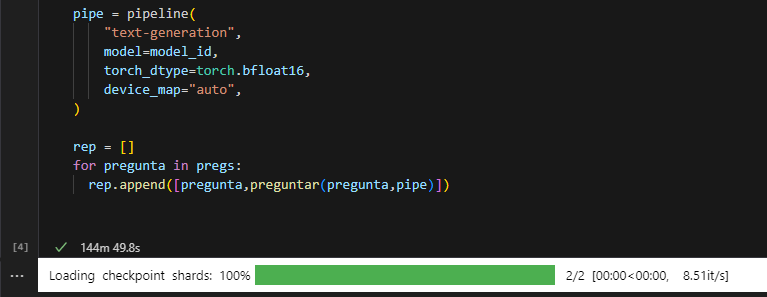

# Configuración y carga de los datos


In [5]:
import json
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

# Carga de datos en formato JSONL
train_dataset = load_dataset("json", data_files="./data/train.jsonl")["train"]
eval_dataset = load_dataset("json", data_files="./data/validation.jsonl")["train"]

eval_dataset,train_dataset

(Dataset({
     features: ['messages'],
     num_rows: 19
 }),
 Dataset({
     features: ['messages'],
     num_rows: 81
 }))

In [6]:
# Inicializa el tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)

def preprocess_function(examples):
    # Combina los mensajes en una secuencia de entrada para el modelo
    text = ""
    for message in examples["messages"]:
        role, content = message["role"], message["content"]
        prefix = "User: " if role == "user" else "Assistant: "
        text += prefix + content + "\n"

    # Asigna el token de padding si no existe
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token  # Usa el token de fin de secuencia como padding

    inputs = tokenizer(text, padding="max_length", max_length=512, truncation=True)
    inputs["labels"] = inputs["input_ids"].copy()  # Usa los mismos `input_ids` como labels

    return inputs

# Tokeniza los datos de entrenamiento y validación
tokenized_train = train_dataset.map(preprocess_function, batched=False)
tokenized_eval = eval_dataset.map(preprocess_function, batched=False)


Map:   0%|          | 0/19 [00:00<?, ? examples/s]

In [ ]:
tokenized_train,tokenized_eval

(Dataset({
     features: ['messages', 'input_ids', 'attention_mask', 'labels'],
     num_rows: 81
 }),
 Dataset({
     features: ['messages', 'input_ids', 'attention_mask', 'labels'],
     num_rows: 19
 }))

: 

<hr>

### Features de Entrenamiento del Modelo

1. **messages**  
   Este campo contiene una lista de mensajes en formato JSON. Cada mensaje está estructurado en pares `role` y `content`:
   - `role` indica el emisor del mensaje, que puede ser el usuario (`user`) o el asistente (`assistant`).
   - `content` es el texto del mensaje.

   **Ejemplo de `messages`:**
   ```json
   [
       {"role": "user", "content": "¿Cuál es el objetivo del programa Kit Consulting?"},
       {"role": "assistant", "content": "El objetivo del programa Kit Consulting es apoyar la transformación digital de las PYMEs."}
   ]

2. **input_ids**
   Este es el resultado de tokenizar el campo `messages` y convertir el texto en IDs de tokens que el modelo entiende. Cada `input_id` representa un token específico (por ejemplo, una palabra o subpalabra). Los tokens están alineados a una longitud fija mediante padding para facilitar el procesamiento en batch.
   **Ejemplo de `input_ids` (tokens numerados):**
    ```py
   [101, 1234, 567, 1012, ...]

3. **attention_mask**
   El `attention_mask` es un vector binario que indica al modelo qué tokens deben ser atendidos y cuáles deben ignorarse (padding). Un valor de `1` significa que el token correspondiente debe ser considerado, mientras que `0` indica que es un token de padding y debe ser ignorado.
   **Ejemplo de `attention_mask`:**
   ```py
   [1, 1, 1, 0, 0, ...]

4. **labels**
   Este campo contiene las etiquetas de los tokens que queremos que el modelo prediga, alineadas con `input_ids`. En la mayoría de los casos de entrenamiento de lenguaje, `labels` es una copia de `input_ids`, desplazada en el tiempo para que el modelo intente predecir el siguiente token. Cuando hay padding, los valores correspondientes de `labels` también deben ser ignorados (configurándolos en `-100`).

   **Ejemplo de `labels`:**
   ```py
   [101, 1234, 567, -100, -100, ...]

Estos features son esenciales para que el modelo entienda y procese las entradas de manera eficiente, calculando la pérdida y realizando las predicciones durante el entrenamiento.

<hr>

## Durante el entrenamiento tener en cuenta los siguientes hiper-parámetros y :

### Parámetros Clave en `Fine-Tuning` de Modelos de Lenguaje

Durante el proceso de **`fine-tuning`** de un modelo de lenguaje, hay varios parámetros importantes a considerar para asegurar que el modelo se ajuste adecuadamente a tus necesidades. A continuación, se detallan los más relevantes:

#### 1. Tasa de Aprendizaje (`Learning Rate`)
   - Controla cuán grandes son los pasos en la actualización de los pesos del modelo durante el entrenamiento.
   - Una tasa de aprendizaje **`alta`** puede hacer que el modelo no converja correctamente.
   - Una tasa demasiado **`baja`** puede resultar en un entrenamiento lento.
   - Se recomienda probar diferentes valores y usar **`learning rate schedules`** para ajustarlo durante el entrenamiento.

#### 2. Tamaño del Lote (`Batch Size`)
   - Determina cuántos ejemplos de entrenamiento se procesan antes de actualizar los pesos del modelo.
   - Un **`batch size`** mayor puede acelerar el entrenamiento, pero puede consumir más memoria y provocar sobreajuste si no se ajusta adecuadamente.
   - Un tamaño del lote adecuado influye en la estabilidad del entrenamiento.

#### 3. Número de Épocas (`Epochs`)
   - Representa cuántas veces el modelo pasa por todo el conjunto de datos de entrenamiento.
   - Un número excesivo de épocas puede llevar a **sobreajuste (`overfitting`)**.
   - Un número bajo puede resultar en un **`modelo subentrenado`**.
   - Es importante monitorear la **`pérdida en el conjunto de validación`** para evitar el sobreajuste.

#### 4. Función de Pérdida (`Loss Function`)
   - La función de pérdida depende del tipo de tarea:
     - **`Cross-entropy loss`**: Comúnmente utilizada en clasificación y tareas de generación de texto.
     - **`Mean squared error` (`MSE`)**: Usada en tareas de regresión.
   - Elegir la función de pérdida adecuada es crucial para optimizar el modelo según el objetivo.

#### 5. Regularización (`Weight Decay`, `Dropout`)
   - **`Weight decay`** (`L2 regularization`) penaliza los pesos grandes durante el entrenamiento, ayudando a evitar el sobreajuste.
   - **`Dropout`** es otra técnica que apaga aleatoriamente algunas neuronas durante el entrenamiento para mejorar la generalización.

#### 6. Optimización
   - El optimizador determina cómo se ajustan los parámetros del modelo durante el entrenamiento. Algunos de los más comunes son:
     - **`Adam`**: Muy popular debido a su eficiencia en la mayoría de los casos.
     - **`SGD`** (`Stochastic Gradient Descent`): Utilizado en casos específicos, aunque suele ser más lento y difícil de ajustar.

#### 7. Warm-up Steps
   - Algunos modelos aplican un periodo de "`warm-up`", donde la tasa de aprendizaje comienza pequeña y luego aumenta hasta el valor objetivo.
   - Esto ayuda a estabilizar el modelo al principio del entrenamiento antes de pasar a un ritmo de aprendizaje más rápido.

#### 8. Tamaño del Conjunto de Datos
   - Es fundamental tener suficiente variedad y cantidad en el conjunto de datos para evitar el sobreajuste y mejorar la generalización.
   - Si el conjunto de datos es pequeño, se pueden aplicar técnicas de **`data augmentation`** o usar técnicas de regularización adicionales.

#### 9. Puntos de Control (Checkpoints)
   - Es recomendable guardar el modelo en diferentes puntos del entrenamiento.
   - Esto permite retomar el proceso si algo sale mal o elegir el mejor modelo basado en el desempeño durante el entrenamiento.

#### 10. Evaluación y Validación
   - Mantén un conjunto de **`validación`** separado del entrenamiento para monitorear el desempeño del modelo.
   - Dependiendo de la tarea, utiliza métricas adecuadas, como **`precisión`**, **`F1-score`**, o **`perplexidad`**.

#### 11. Tokenización y Preprocesamiento
   - Si trabajas con texto, asegúrate de que la **`tokenización`** esté alineada con la del modelo base.
   - Esto asegura que los datos de entrada se procesen correctamente y que el modelo pueda interpretarlos de manera adecuada.


In [ ]:
# Cargar el modelo preentrenado
model = AutoModelForCausalLM.from_pretrained(model_id)

# Configura los argumentos de entrenamiento para GPU
training_args = TrainingArguments(
    output_dir="./fine_tuned_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_steps=500,
    fp16=True,  # Habilita mixed precision si tu GPU lo soporta
    logging_dir="./logs",
)

# Entrenamiento para CPU
training_args = TrainingArguments(
    output_dir="./fine_tuned_model",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=1,  # Reduce el batch size
    per_device_eval_batch_size=1,   # Reduce el batch size
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_steps=500,
    fp16=False,  # Desactiva fp16 si tienes problemas de compatibilidad
    logging_dir="./logs",
)



# Configura el Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
)

# Inicia el entrenamiento
trainer.train()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\edvar\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/243 [00:00<?, ?it/s]

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
rep = []
for pregunta in pregs:
  print("ey")
  break
  rep.append([pregunta,preguntar(pregunta,pipe)])